In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df_final = pd.read_csv('df_final.csv') #chargement du fichier 

<h4>Analyse avec la méthode PCA</h4>

In [3]:
#définition de l'index pour utiliser la méthode PCA pour notre première analyse
df_final.set_index('Zone', inplace = True) 

In [4]:
# Sélectionner les colonnes numériques
cols_num = df_final.select_dtypes(include=['float64', 'int64']).columns
df_num = df_final[cols_num]

# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Appliquer la méthode PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
principal_components = pca.transform(df_scaled)


In [5]:
X= df_final
names = df_final.index
nom_variable = df_final.columns

In [6]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [7]:
X.head()

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance
Zone,,,,,,,,,
Afghanistan,0.54,57.0,-1.53,29.0,36296.113,2058.4,-2.80,49.547241,47.838715
Afrique du Sud,14.11,2118.0,63.00,514.0,57009.756,13860.3,-0.28,24.268178,78.706327
Albanie,6.26,47.0,0.00,38.0,2884.169,12771.0,0.38,74.509804,25.490196
Algérie,1.97,277.0,0.00,2.0,41389.189,11737.4,-0.92,0.722022,99.277978
Allemagne,7.96,1739.0,646.00,842.0,82658.409,53071.5,0.59,49.239766,88.538012


In [8]:
# Calcul des composantes principales

pca = decomposition.PCA(n_components=9) #correspond aux 9 variables 
pca.fit(X_scaled)

PCA(n_components=9)

In [9]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[2.39674457 2.08734295 1.19119533 1.08329537 0.78553791 0.5249651
 0.41861419 0.35787775 0.21249135]
[0.26459787 0.49503815 0.62654476 0.74613933 0.83286182 0.89081737
 0.9370319  0.9765412  1.        ]


In [10]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(9)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.396745,26.0,26.0
1,Dim2,2.087343,23.0,50.0
2,Dim3,1.191195,13.0,63.0
3,Dim4,1.083295,12.0,75.0
4,Dim5,0.785538,9.0,83.0
5,Dim6,0.524965,6.0,89.0
6,Dim7,0.418614,5.0,94.0
7,Dim8,0.357878,4.0,98.0
8,Dim9,0.212491,2.0,100.0


In [11]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

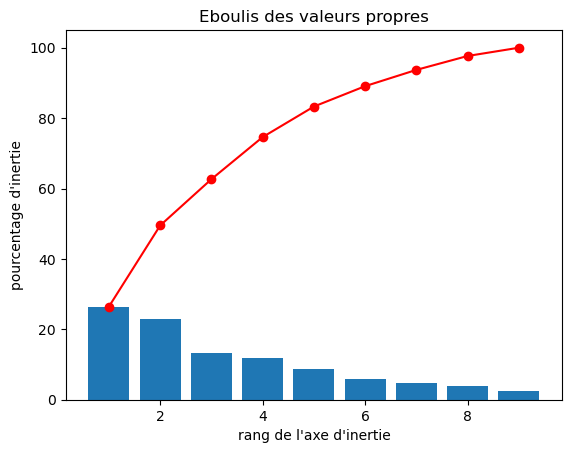

In [12]:
display_scree_plot(pca)

In [13]:
# Calcul des composantes principales
n_comp = 6
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

In [14]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))
 
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
           
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
           
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
       
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

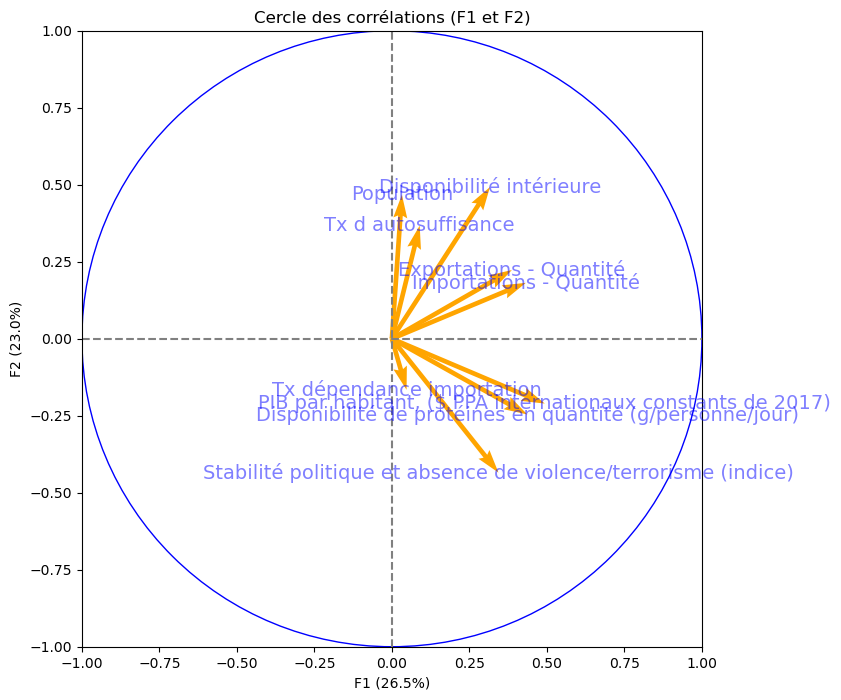

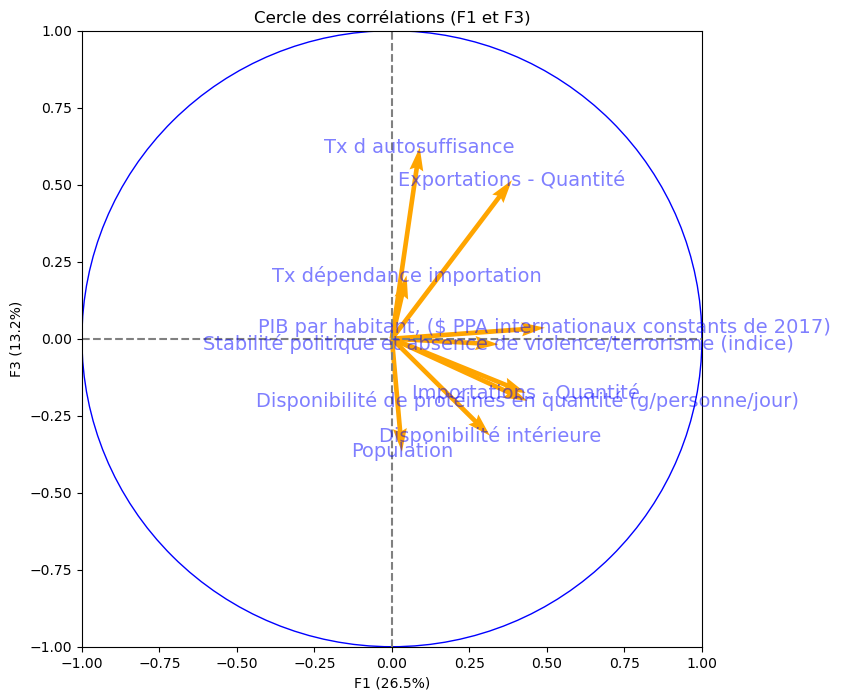

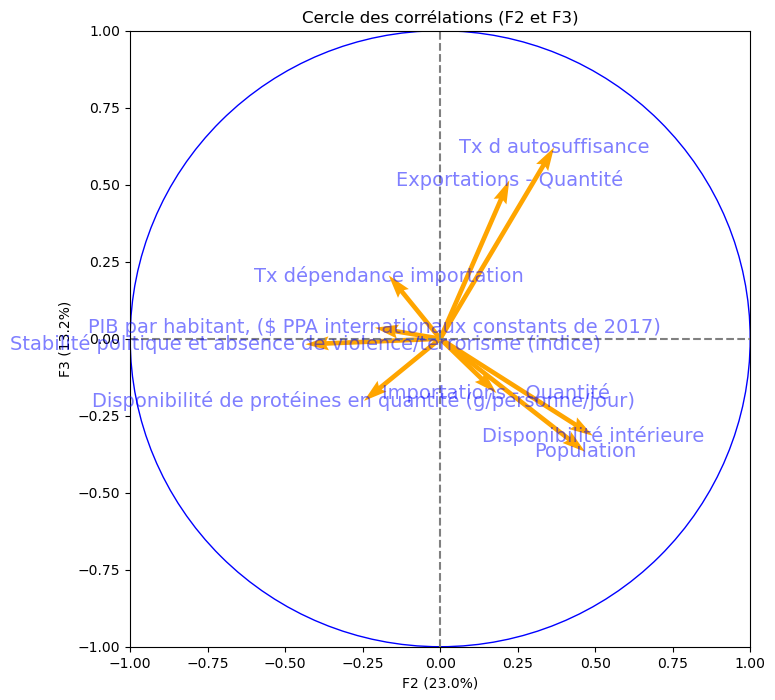

In [15]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable))

In [16]:
# Fonction qui permet de projeter les individus sur les dimensions
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure      
            fig = plt.figure(figsize=(8,8))
       
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
               
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
       
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

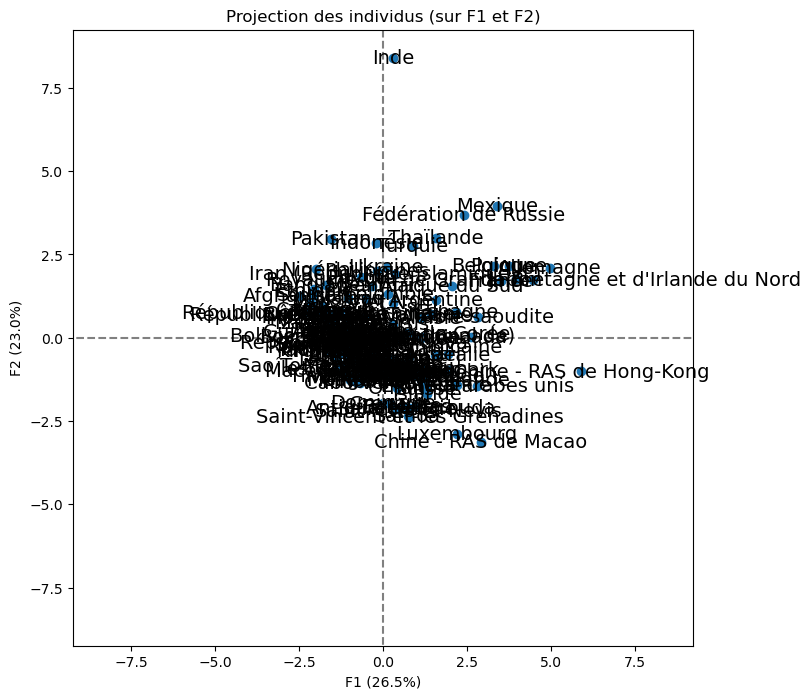

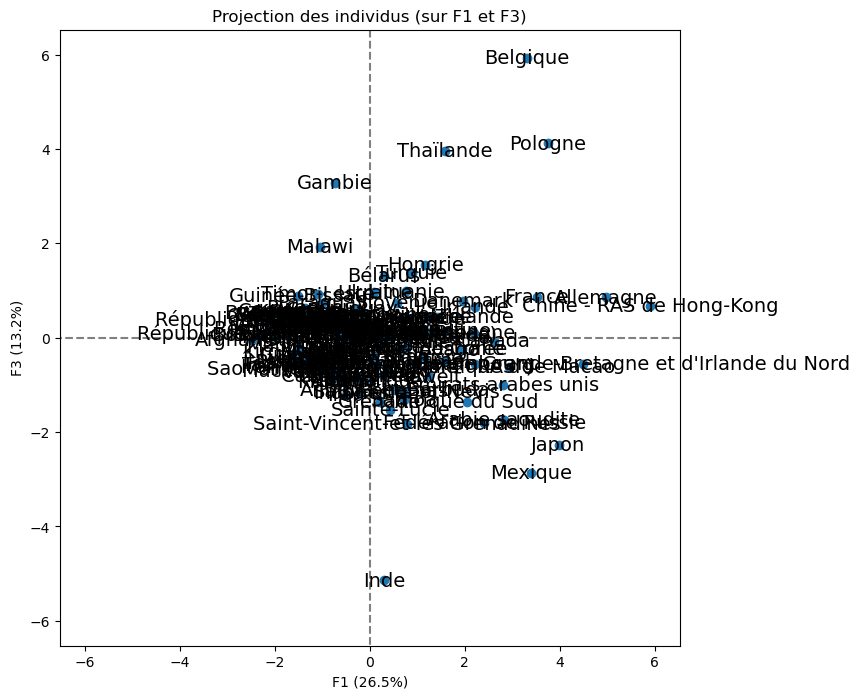

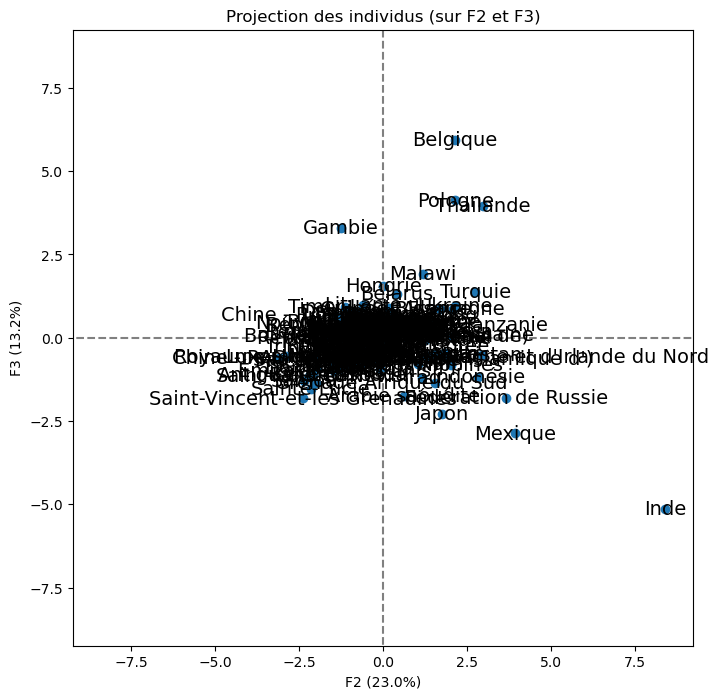

<Figure size 640x480 with 0 Axes>

In [17]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(names))
plt.figure()
plt.show()

In [18]:
#je supprime les outliers apparaissant dans la projection 
df_final_sans_outliers = df_final.drop(index=['Inde'])

In [19]:
# Préparation des données pour l'ACP avec les nouvelles données

X = df_final_sans_outliers.values
names = df_final_sans_outliers.index
features = df_final_sans_outliers.columns

X.shape

(155, 9)

In [20]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-1.18186858, -0.47560153, -0.33840026, ..., -3.098981  ,
         0.02700555, -0.54936596],
       [ 1.26325449,  2.33756111,  0.08756199, ..., -0.26404265,
        -0.228023  ,  0.13577421],
       [-0.15120506, -0.48925104, -0.32830073, ...,  0.47844121,
         0.27884108, -1.04541561],
       ...,
       [-0.17102551, -0.08795564, -0.32830073, ..., -0.02779778,
        -0.4728532 ,  0.60841041],
       [-1.27196154, -0.5342944 , -0.32255787, ..., -1.8390084 ,
        -0.40145526,  0.58798938],
       [-1.00708823, -0.54930885, -0.32830073, ...,  0.27594561,
         0.53599965, -1.61119819]])

In [21]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    

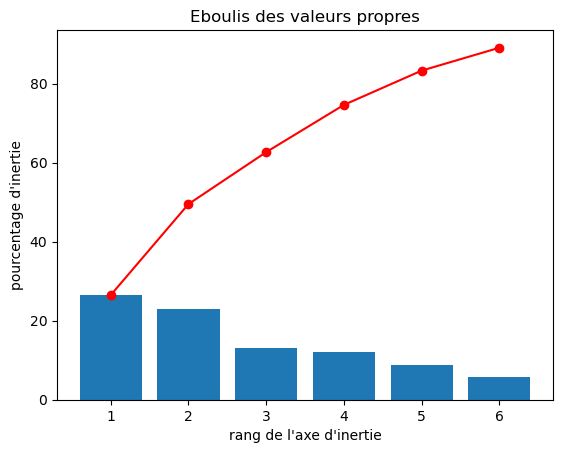

In [22]:
display_scree_plot(pca)

In [23]:
# Variance expliquée
pca.explained_variance_

array([2.39674457, 2.08734295, 1.19119533, 1.08329537, 0.78553791,
       0.5249651 ])

In [24]:
# Proportion de variance expliquée
pca.explained_variance_ratio_

array([0.26459787, 0.23044028, 0.13150661, 0.11959457, 0.08672249,
       0.05795555])

In [25]:
# Cumul de variance expliqué
pca.explained_variance_ratio_.sum()

0.8908173713380081

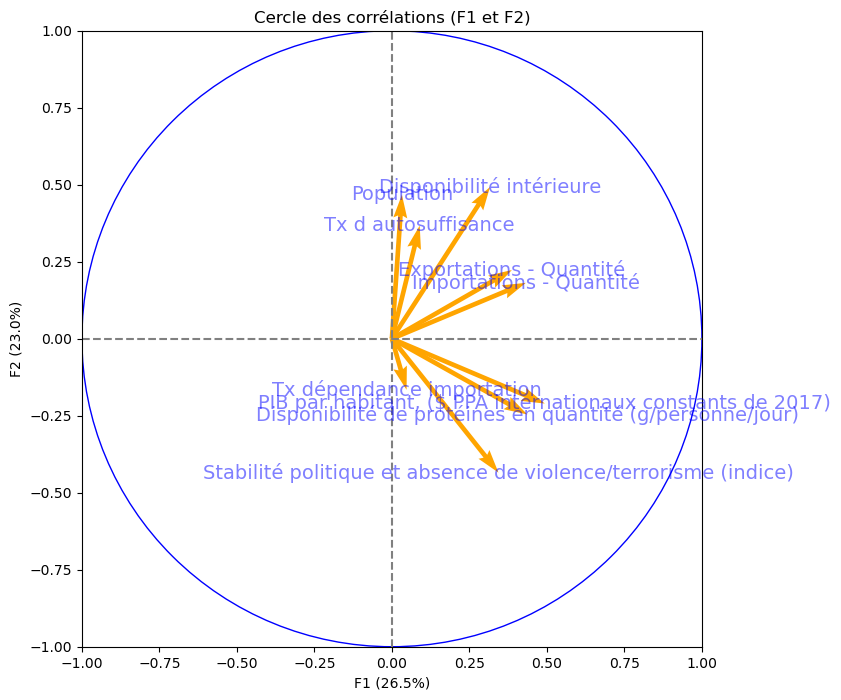

In [26]:
# Cercle des corrélations sans les outliers
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1)], labels=np.array(features))

plt.show()

Sans les outliers, on observe que les variables de population, exportations, inportation, disponibilité intérieure et taux d'auto-suffisance sont corrélées positivement à F2. 
Les autres variable: stabilité politique, PIB par habitant sont très corrélées positivement à F1.

On peut conclure que le F2 représente la demande en volailles, et le F1 représente le développement d’un pays.

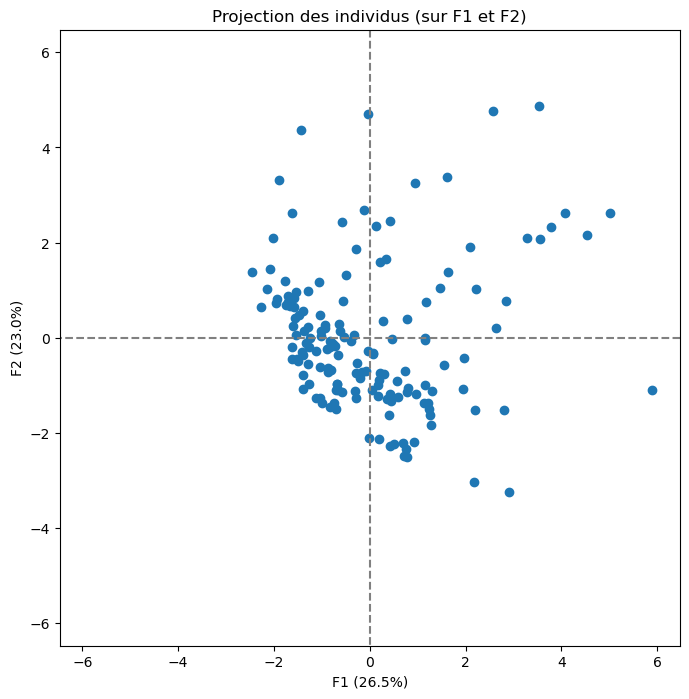

In [27]:
# Projection des individus sur F1 et F2 sans les outliers
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)])

plt.show()

on remarque que sans les outliers les points sont groupés, on va les scinder en groupe grâce à la méthode Kmeans

<h4>Clustering avec la méthode Kmeans</h4>

C:\Users\camille.amiel\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


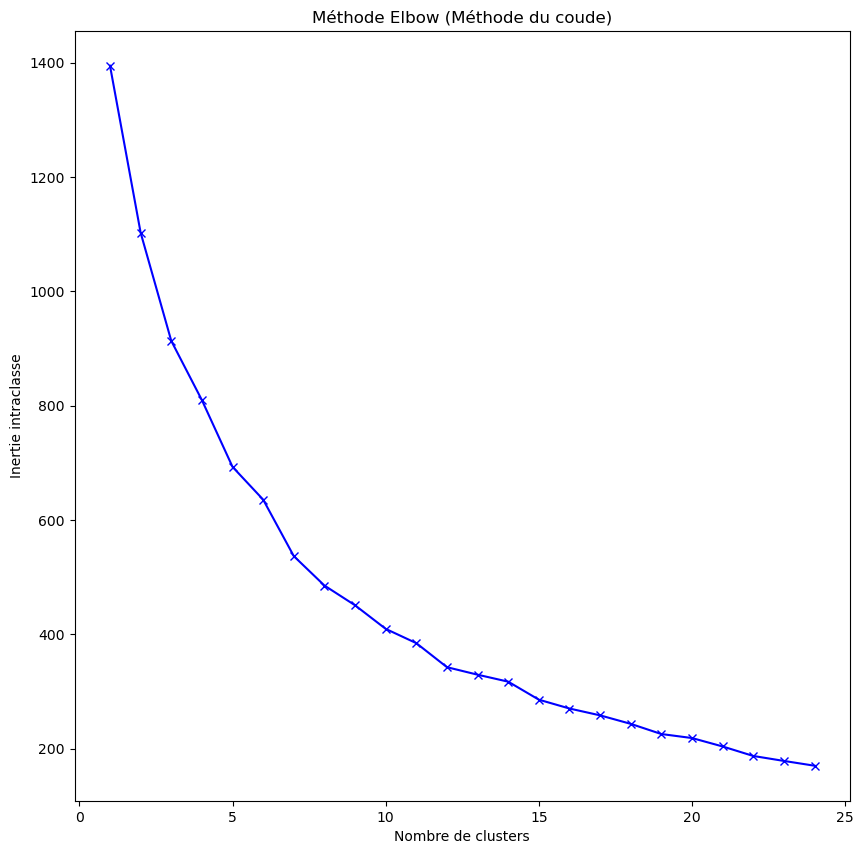

In [28]:
#définition du nombre de clusters avec la méthode Elbow
a = []
for i in range(1, 25):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    a.append(km.inertia_)
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, 25), a, 'bx-')
plt.title('Méthode Elbow (Méthode du coude)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intraclasse')
plt.show()

la méthode ne permet pas de clairement définir le nombre de clusters, nous utilisons donc une autre méthdode

Pour n_clusters=2, Silhouette Coefficient = 0.39035774314428756
Pour n_clusters=3, Silhouette Coefficient = 0.23631285871383936
Pour n_clusters=4, Silhouette Coefficient = 0.26011894232127797
Pour n_clusters=5, Silhouette Coefficient = 0.263719063613151
Pour n_clusters=6, Silhouette Coefficient = 0.2711180516484318
Pour n_clusters=7, Silhouette Coefficient = 0.2602445686781411


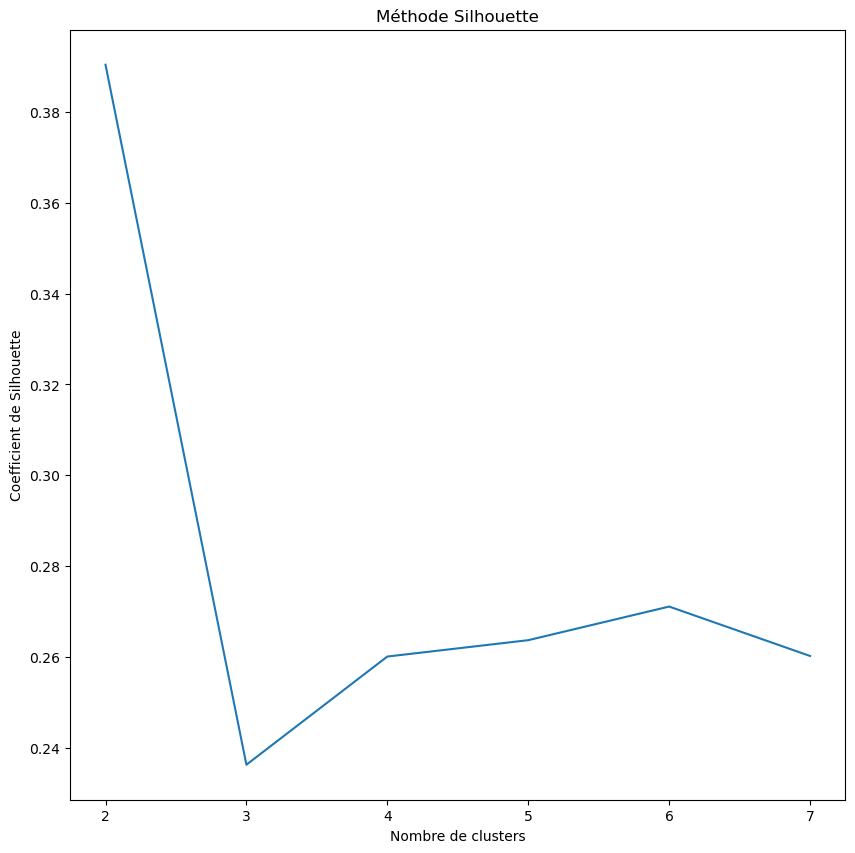

In [29]:
#utilisation de la méthode silhouette pour définir le nombre de clusters 
from sklearn import metrics

k_clusters = []
sil_coeffecients = []

for n_cluster in range(2, 8):
    kmeans = KMeans(n_clusters=n_cluster, random_state=10).fit(X_scaled)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(X_scaled, label)
    print("Pour n_clusters={}, Silhouette Coefficient = {}".format(
        n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)

# graphique
fig = plt.figure(figsize=(10, 10))
plt.title("Méthode Silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de Silhouette")
plt.plot(k_clusters, sil_coeffecients)
plt.show()

Pour n_clusters = 2 , le score moyen de silhouette est de : 0.39035774314428756
Pour n_clusters = 3 , le score moyen de silhouette est de : 0.23631285871383936
Pour n_clusters = 4 , le score moyen de silhouette est de : 0.26011894232127797
Pour n_clusters = 5 , le score moyen de silhouette est de : 0.263719063613151
Pour n_clusters = 6 , le score moyen de silhouette est de : 0.2711180516484318
Pour n_clusters = 7 , le score moyen de silhouette est de : 0.2602445686781411


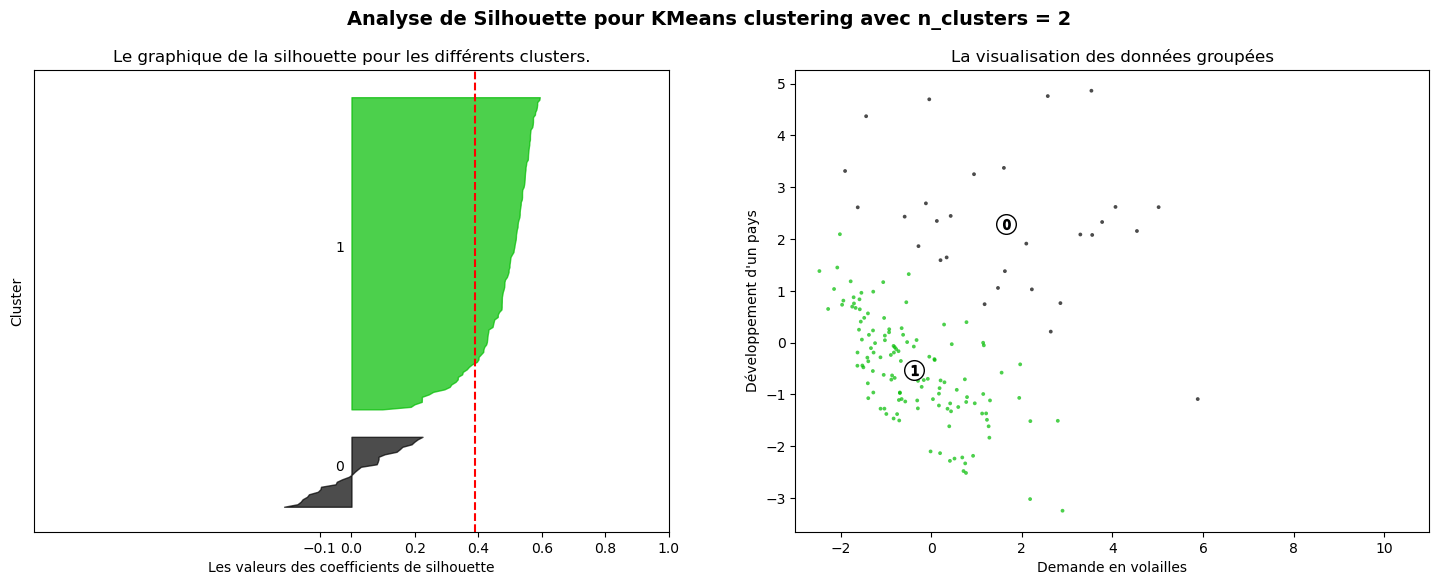

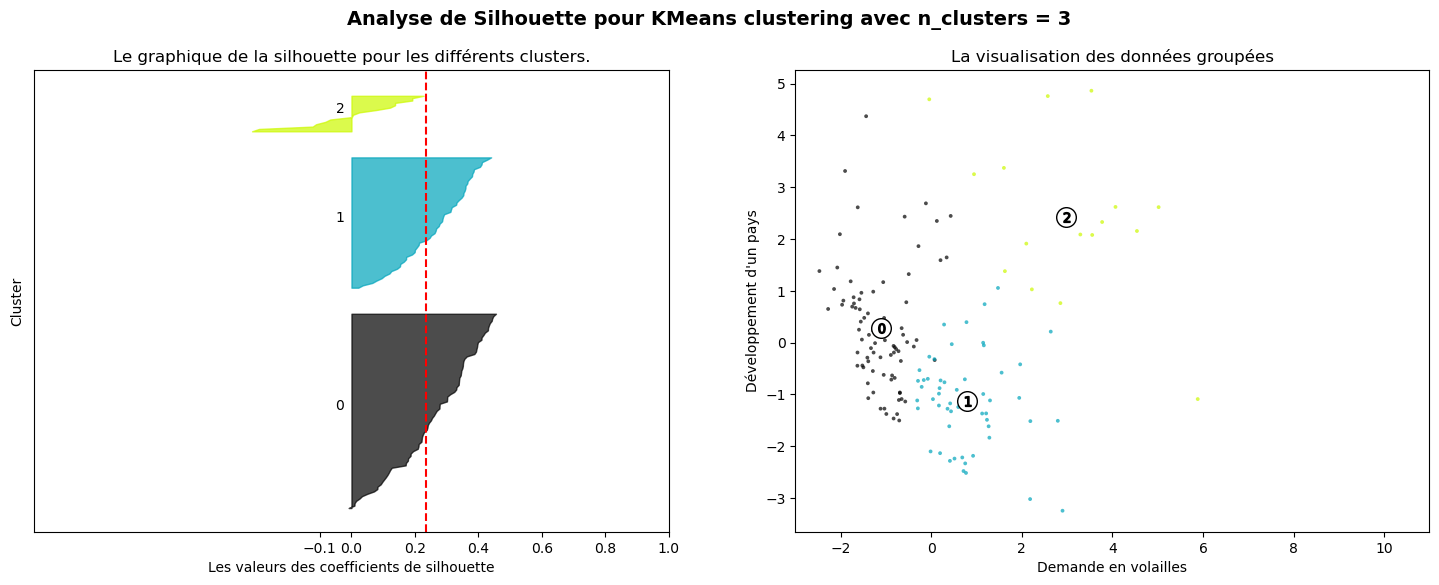

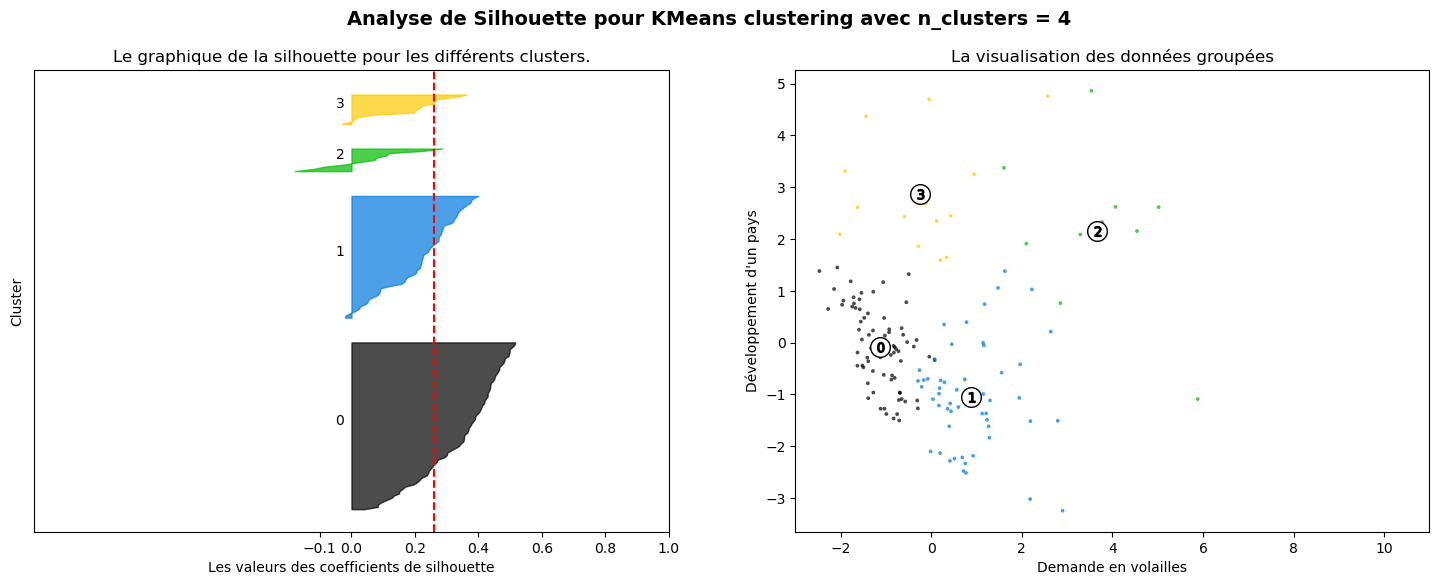

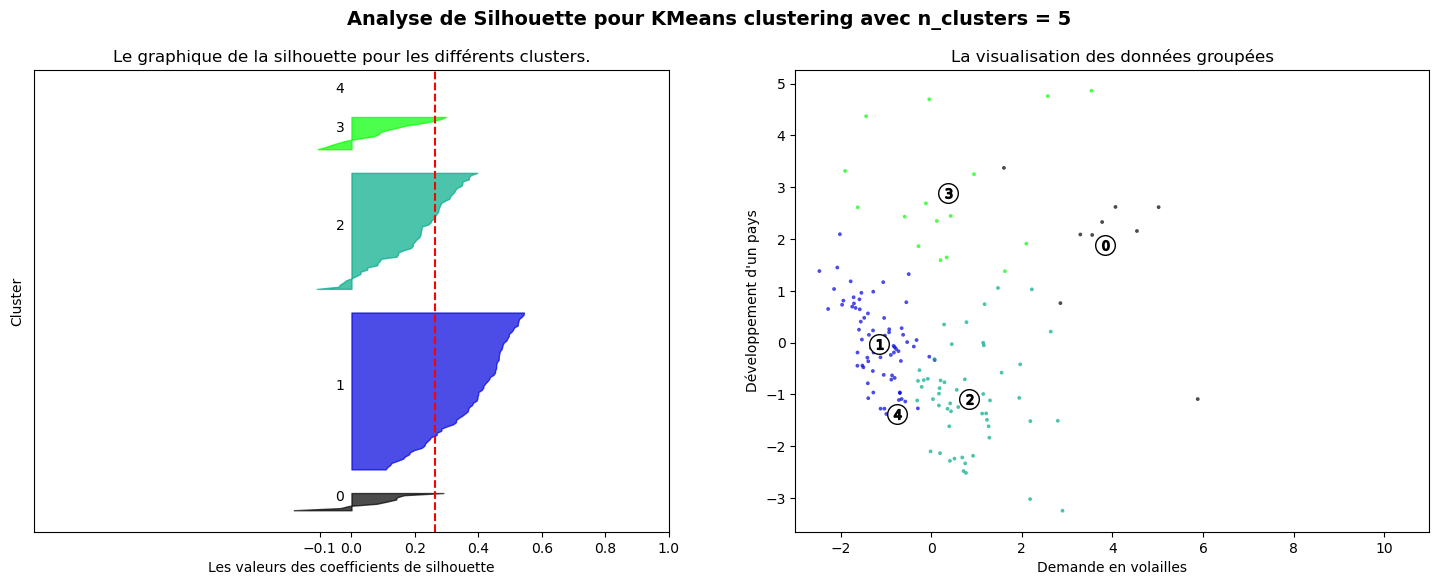

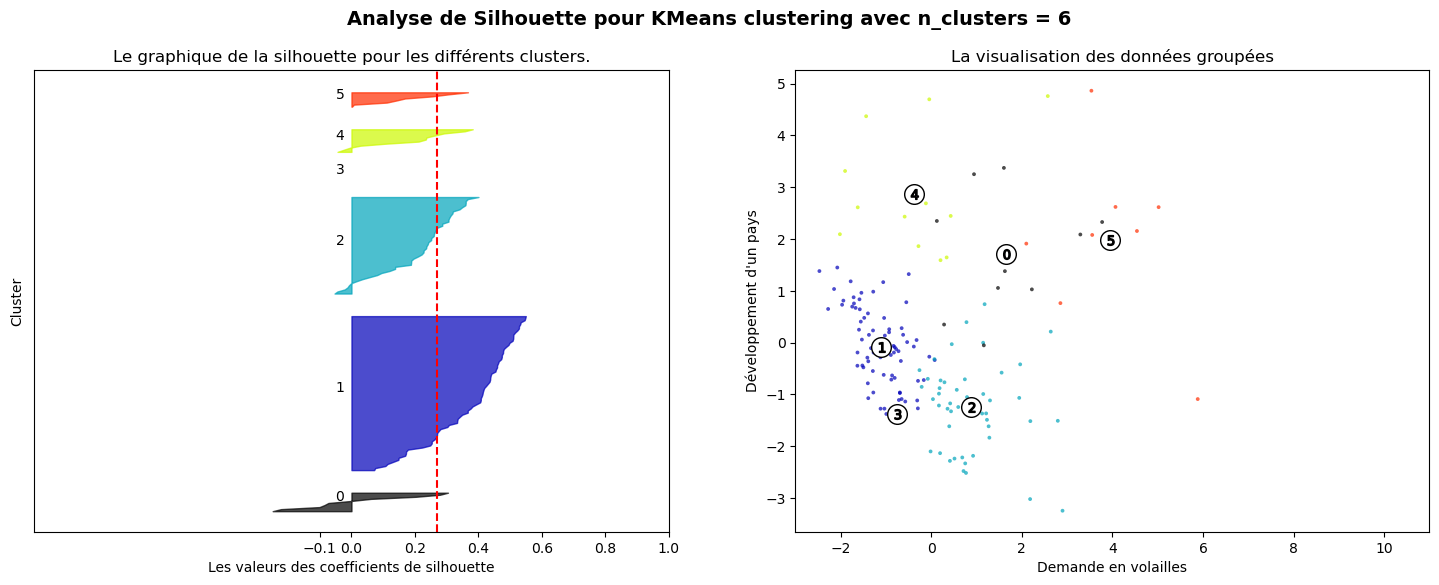

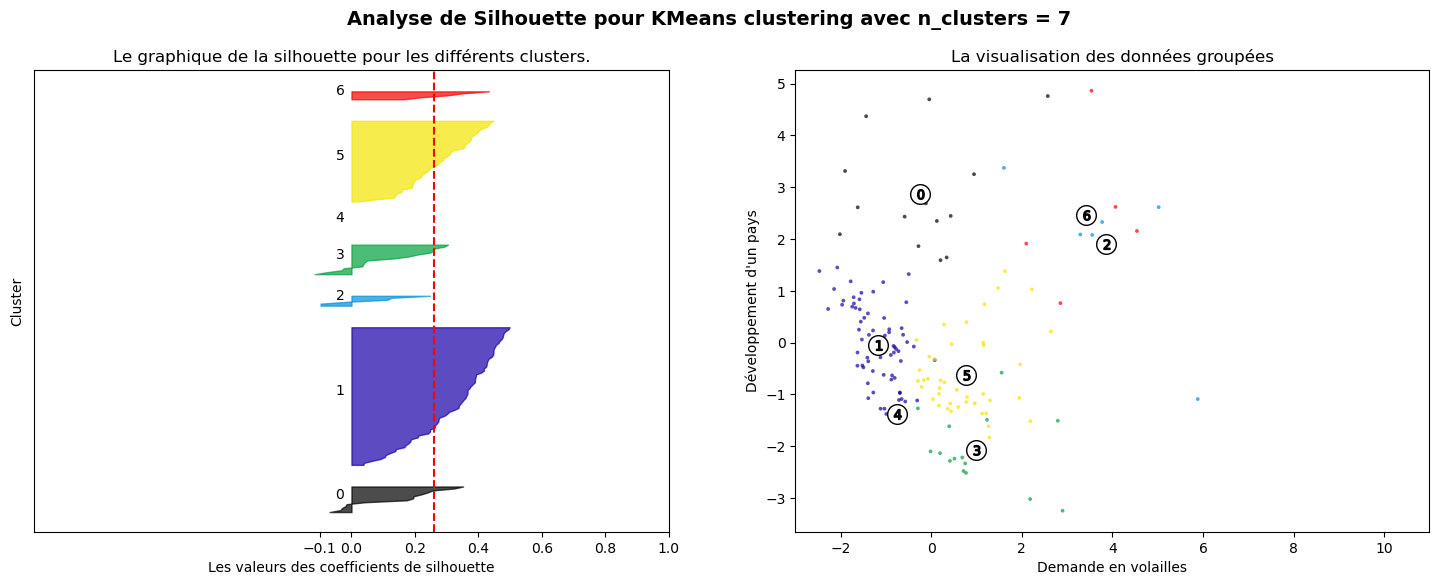

In [30]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Création de subplot avec 1 ligne et 2 colonnes
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 6)

    # Le premier subplot est le graphique de Silouette
    # Le coefficient Silhouette peut être entre -1, 1,
    ax1.set_xlim([-1, 1])
    # Le (n_clusters+1)*10 sert à insérer un espace vide entre la Silhouette
    # Parcelles de clusters individuels, pour les délimiter clairement.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialiser le clusterer avec la valeur n_clusters et un générateur aléatoire
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # Le score Silhouette donne la valeur moyenne pour tous les échantillons.
    # Cela donne une perspective sur la densité et la séparation de la forme clusters
    silhouette_avg = metrics.silhouette_score(X_scaled, cluster_labels)
    print("Pour n_clusters =", n_clusters, ",",
          "le score moyen de silhouette est de :", silhouette_avg,)

    # Calculer les scores de silhouette pour chaque échantillon
    sample_silhouette_values = metrics.silhouette_samples(
        X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agréger les scores de silhouette pour les échantillons appartenant au cluster i, et les trier
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7,)

        # Étiquetez les parcelles de silhouette avec leurs numéros de cluster au milieu
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculer le nouveau y_lower pour le prochain tracé
        y_lower = y_upper + 10  # 10 pour les 0 échantillons

    ax1.set_title("Le graphique de la silhouette pour les différents clusters.")
    ax1.set_xlabel("Les valeurs des coefficients de silhouette")
    ax1.set_ylabel("Cluster")

    # La ligne verticale pour le score de silhouette moyen de toutes les valeurs
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Effacer les étiquettes / ticks de l'axe Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2ème graphique montrant les clusters réels formés
    X_projected = pca.transform(X_scaled)
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_projected[:, 0], X_projected[:, 1], marker=".",
                s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Étiquetez les clusters
    centroids = clusterer.cluster_centers_
    centroids_projected = pca.transform(centroids)
    # Dessinez des cercles blancs au centre des clusters
    ax2.scatter(centroids_projected[:, 0], centroids_projected[:, 1],
                marker="o", c="white", alpha=1, s=200, edgecolor="k",)

    for i, c in enumerate(centroids_projected):
        ax2.scatter(c[0], c[1], marker="$%d$" %
                    i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("La visualisation des données groupées")
    ax2.set_xlabel("Demande en volailles")
    ax2.set_ylabel("Développement d'un pays")
    ax2.set_xlim([-4, 5])
    ax2.set_xlim([-3, 11])

    plt.suptitle("Analyse de Silhouette pour KMeans clustering avec n_clusters = %d" %
                 n_clusters, fontsize=14, fontweight="bold",)

plt.show()

Après nos observations, l'analyse de silhouette avec le nombre de cluster 4 semblent le plus pertinent.
Nous allons donc procéder à la projetion des individus groupés sur le plan factoriel avec le nombre de clusters égale à 4

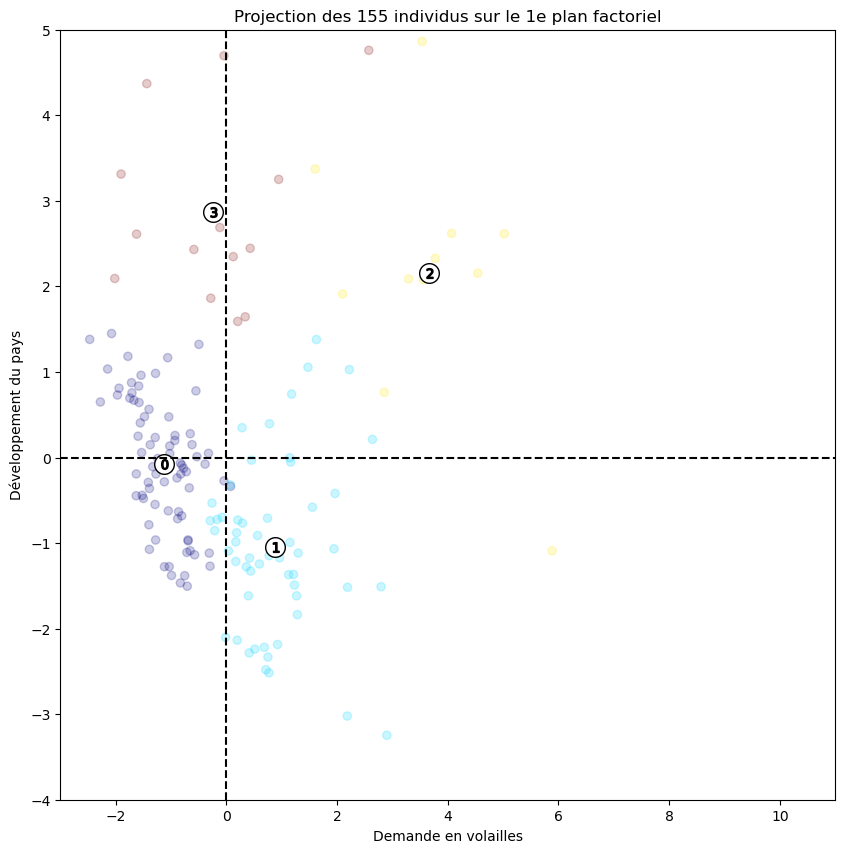

In [31]:
# Nombre de clusters souhaités
n_clust = 4

# Clustering par K-means
km = KMeans(n_clusters=n_clust, random_state=10)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel

X_projected = pca.transform(X_scaled)
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_projected[:, 0], X_projected[:, 1],
            c=clusters.astype(np.float64), cmap='jet', alpha=0.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(
    X_projected.shape[0]))
plt.xlabel("Demande en volailles")
plt.ylabel("Développement du pays")

# affichage des lignes horizontales et verticales
plt.plot([-3, 11], [0, 0], color='black', ls='--')
plt.plot([0, 0], [-4, 5], color='black', ls='--')

# Affichage des positions des centres de classes
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1],
            marker="o", c="white", alpha=1, s=200, edgecolor="k")
for i, c in enumerate(centroids_projected):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

# définition des limites du graphique
plt.xlim([-3, 11])
plt.ylim([-4, 5])

plt.show(block=False)

Pour conclure selon les observations:

Cluster 0 : Les pays moyennement developpés avec une très faible demande de volailles.  
Cluster 1 : Les pays peu développés avec une faible demande de volailles.  
Cluster 2 : Les pays bien développés avec une forte demande de volailles.  
Cluster 3 : Les pays bien développés avec une très faible demande de volailles.  

<h4>Dendogramme hiérarchique</h4>

On va maintenant pousser l'analyse en utilisant un dendogramme hierarchique

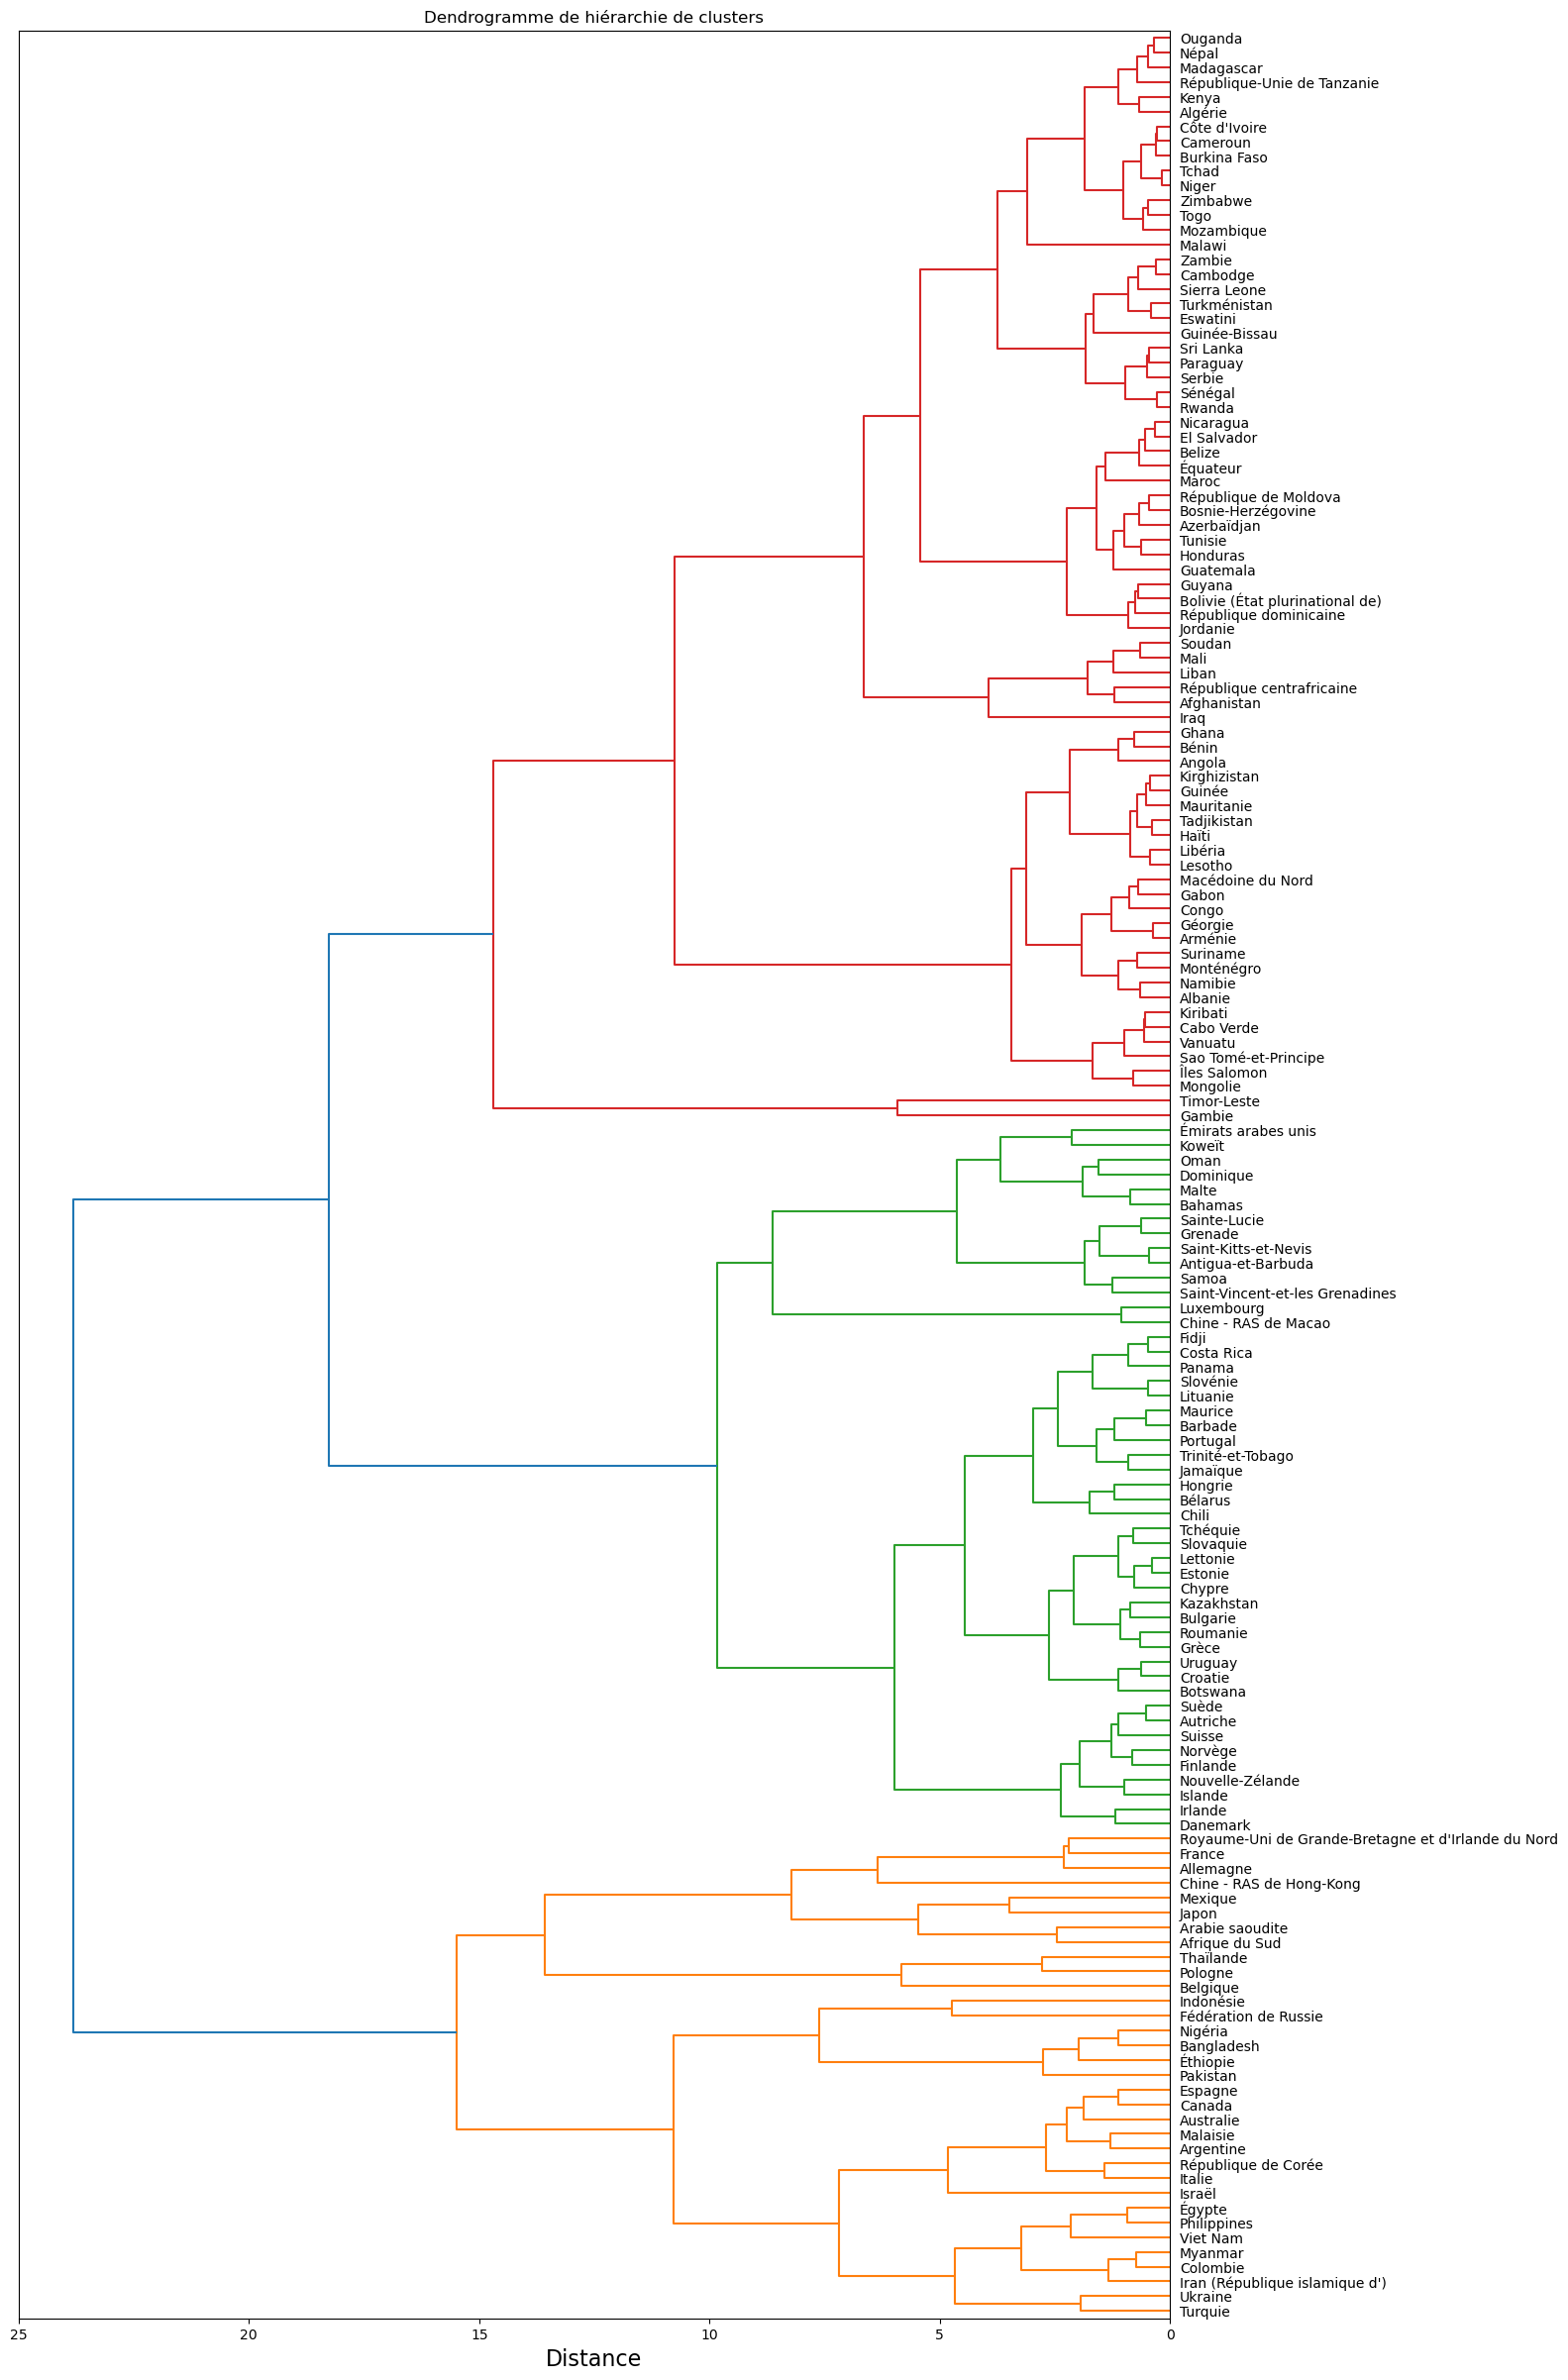

In [32]:
Z = linkage(X_scaled, 'ward')
fig = plt.figure(figsize=(15, 30))
plt.title('Dendrogramme de hiérarchie de clusters')
plt.xlabel('Distance', fontsize=16)
den = dendrogram(Z, orientation='left', leaf_font_size=10,
           labels=df_final_sans_outliers.index, color_threshold=16)
plt.show()

Nous allons rélaiser un Heatmap, pour voir si les variables confirment bien les 4 groupes identifiés et également que les groupes identifiés par KMeans correspondent bien à ceux du Dendrogramme.

<h4>Heatmap - Dendrogramme</h4>

In [33]:
# Préparation des données centrées réduites
df_final_sans_outliers2 = pd.DataFrame(X_scaled, names, columns=features)
df_final_sans_outliers2

,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance
Zone,,,,,,,,,
Afghanistan,-1.181869,-0.475602,-0.338400,-0.307038,0.276829,-0.879561,-3.098981,0.027006,-0.549366
Afrique du Sud,1.263254,2.337561,0.087562,2.296931,0.782748,-0.311401,-0.264043,-0.228023,0.135774
Albanie,-0.151205,-0.489251,-0.328301,-0.258717,-0.539239,-0.363841,0.478441,0.278841,-1.045416
Algérie,-0.924203,-0.175312,-0.328301,-0.452001,0.401224,-0.413600,-0.984027,-0.465569,0.592384
Allemagne,0.155111,1.820245,3.935942,4.057965,1.409201,1.576283,0.714686,0.023904,0.353999
...,...,...,...,...,...,...,...,...,...
Égypte,-0.466530,1.152784,-0.321700,0.127852,1.745872,-0.448402,-1.546515,-0.382410,0.411232
Émirats arabes unis,1.387583,0.008956,0.292193,1.862041,-0.377963,2.255660,0.748435,0.655915,-1.335898
Équateur,-0.171026,-0.087956,-0.328301,-0.462739,-0.199710,-0.419353,-0.027798,-0.472853,0.608410


In [34]:
# Coupage du dendrogramme en 4 clusters
groupes_den = fcluster(Z, 4, criterion='maxclust')
print (groupes_den)

[4 2 4 4 2 4 3 2 1 4 1 3 4 3 1 3 2 4 4 4 3 3 4 3 4 4 4 4 1 3 2 3 3 1 4 3 3
 4 3 3 4 1 3 4 3 3 2 1 4 4 4 3 3 4 4 4 4 4 4 4 3 1 1 4 3 3 1 1 3 2 4 3 4 4
 4 3 4 3 4 4 3 3 4 4 1 4 4 3 4 3 4 2 4 4 4 1 4 4 4 1 3 3 4 3 4 1 3 4 1 2 3
 3 2 4 4 1 4 4 4 3 3 3 3 4 4 4 3 3 4 4 3 4 3 4 4 4 3 2 4 4 3 4 4 1 1 3 4 1
 4 4 1 3 4 1 4]


In [35]:
# index triés des groupes dendogramme
idg = np.argsort(groupes_den)
# affichage des pays et leurs groupes
groupe_den = pd.DataFrame(
    groupes_den[idg], df_final_sans_outliers.index[idg], columns=['Groupe'])
groupe_den

,Groupe
Zone,
Colombie,1
Turquie,1
République de Corée,1
Malaisie,1
Viet Nam,1
...,...
Iraq,4
Honduras,4
Haïti,4


In [36]:
# Préparation du df pour heatmap entre les groupes du dendrogramme et les variables
df_heatmap_den = pd.concat([df_final_sans_outliers2, groupe_den], axis=1).reset_index()
df_heatmap_den

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance,Groupe
0,Afghanistan,-1.181869,-0.475602,-0.338400,-0.307038,0.276829,-0.879561,-3.098981,0.027006,-0.549366,4
1,Afrique du Sud,1.263254,2.337561,0.087562,2.296931,0.782748,-0.311401,-0.264043,-0.228023,0.135774,2
2,Albanie,-0.151205,-0.489251,-0.328301,-0.258717,-0.539239,-0.363841,0.478441,0.278841,-1.045416,4
3,Algérie,-0.924203,-0.175312,-0.328301,-0.452001,0.401224,-0.413600,-0.984027,-0.465569,0.592384,4
4,Allemagne,0.155111,1.820245,3.935942,4.057965,1.409201,1.576283,0.714686,0.023904,0.353999,2
...,...,...,...,...,...,...,...,...,...,...,...
150,Égypte,-0.466530,1.152784,-0.321700,0.127852,1.745872,-0.448402,-1.546515,-0.382410,0.411232,1
151,Émirats arabes unis,1.387583,0.008956,0.292193,1.862041,-0.377963,2.255660,0.748435,0.655915,-1.335898,3
152,Équateur,-0.171026,-0.087956,-0.328301,-0.462739,-0.199710,-0.419353,-0.027798,-0.472853,0.608410,4
153,Éthiopie,-1.271962,-0.534294,-0.322558,-0.457370,1.989074,-0.881333,-1.839008,-0.401455,0.587989,1


In [37]:
# Réorganisation des données
data_den= df_heatmap_den.groupby('Groupe').agg(['mean'])
data_den

C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_22648\4259409550.py:2: FutureWarning: ['Zone'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_den= df_heatmap_den.groupby('Groupe').agg(['mean'])


,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Groupe,,,,,,,,,
1,0.223582,1.380048,0.190889,-0.022481,1.591682,0.037584,-0.712499,-0.412147,0.594345
2,0.689444,1.705217,2.514928,2.810403,0.905761,0.877525,0.222765,0.281999,0.866415
3,0.690976,-0.385856,-0.168209,-0.172925,-0.493163,0.776917,0.944369,-0.020043,-0.183479
4,-0.617156,-0.413478,-0.321483,-0.298912,-0.287953,-0.645562,-0.433853,0.093612,-0.186475


Affichage du Heatmap relatif au dendrogramme:

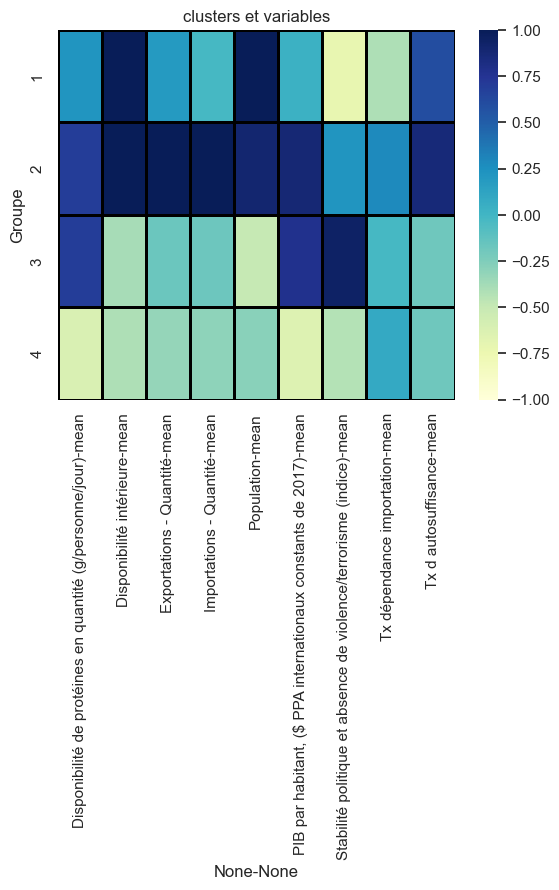

In [38]:
plt.figure()
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(data_den,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1 )
plt.title('clusters et variables')
plt.show()

In [39]:
# le cluster 2 semble retenir les meilleures variables. 

In [40]:
groupe_2 =df_heatmap_den.loc[df_heatmap_den['Groupe']==2]
groupe_2

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance,Groupe
1,Afrique du Sud,1.263254,2.337561,0.087562,2.296931,0.782748,-0.311401,-0.264043,-0.228023,0.135774,2
4,Allemagne,0.155111,1.820245,3.935942,4.057965,1.409201,1.576283,0.714686,0.023904,0.353999,2
7,Arabie saoudite,1.526326,1.405300,-0.262291,3.413684,0.198795,1.298733,-0.669034,0.075635,-0.581621,2
16,Belgique,-0.455719,-0.345931,4.001952,1.351985,-0.330762,1.449709,0.534690,1.878818,5.476242,2
30,Chine - RAS de Hong-Kong,2.731770,-0.171218,4.048159,4.406950,-0.431230,1.902234,0.984680,2.941436,-1.412427,2
46,France,0.333495,1.593663,2.978798,2.253979,0.974058,1.167350,0.365944,-0.181982,0.602087,2
69,Japon,0.025377,2.742951,-0.262291,5.276730,2.504498,1.016528,1.299673,-0.143451,-0.109539,2
91,Mexique,0.389353,5.205322,-0.268892,4.755936,2.437932,-0.029244,-0.849030,-0.240041,0.100936,2
109,Pologne,0.908288,1.024479,6.437720,-0.167444,0.317302,0.468693,0.635938,-0.432674,2.167440,2
112,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1.201991,2.495895,2.041457,3.719717,1.020097,1.253778,0.489691,-0.121064,0.191116,2


<h4>Heatmap - Kmeans</h4>

In [41]:
# Récupération des clusters attribués à chaque individu
print (clusters)

[0 2 0 0 2 0 1 2 1 0 1 1 0 1 3 1 2 0 0 0 0 1 0 1 0 0 0 0 1 1 2 1 1 3 0 1 1
 0 1 1 0 1 1 0 1 1 2 3 0 0 0 1 0 0 0 0 1 0 0 0 1 3 3 0 1 1 1 1 1 2 0 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 2 0 0 0 3 0 0 0 3 1 1 0 1 0 3 1 0 3 2 1
 1 2 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 2 0 0 1 0 0 3 3 1 0 3
 0 0 3 1 0 3 0]


In [42]:
# index triés des groupes Kmeans
idk = np.argsort(clusters)
# affichage des pays et leurs groupes
groupe_Kmeans = pd.DataFrame(
    km.labels_[idk], df_final_sans_outliers.index[idk], columns=['Cluster'])
groupe_Kmeans

,Cluster
Zone,
Afghanistan,0
Mozambique,0
Monténégro,0
Mongolie,0
Mauritanie,0
...,...
Indonésie,3
Iran (République islamique d'),3
Pakistan,3


In [43]:
# Correspondance Dendrogramme et Kmeans
pd.crosstab(groupes_den,km.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,8,0,14
2,0,0,11,0
3,3,45,0,0
4,72,2,0,0


In [44]:
# Préparation des données pour heatmap entre clusters tirés de Kmeans et les variables
df_heatmap_kmeans = pd.concat([df_final_sans_outliers2, groupe_Kmeans], axis=1).reset_index()
df_heatmap_kmeans

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance,Cluster
0,Afghanistan,-1.181869,-0.475602,-0.338400,-0.307038,0.276829,-0.879561,-3.098981,0.027006,-0.549366,0
1,Afrique du Sud,1.263254,2.337561,0.087562,2.296931,0.782748,-0.311401,-0.264043,-0.228023,0.135774,2
2,Albanie,-0.151205,-0.489251,-0.328301,-0.258717,-0.539239,-0.363841,0.478441,0.278841,-1.045416,0
3,Algérie,-0.924203,-0.175312,-0.328301,-0.452001,0.401224,-0.413600,-0.984027,-0.465569,0.592384,0
4,Allemagne,0.155111,1.820245,3.935942,4.057965,1.409201,1.576283,0.714686,0.023904,0.353999,2
...,...,...,...,...,...,...,...,...,...,...,...
150,Égypte,-0.466530,1.152784,-0.321700,0.127852,1.745872,-0.448402,-1.546515,-0.382410,0.411232,3
151,Émirats arabes unis,1.387583,0.008956,0.292193,1.862041,-0.377963,2.255660,0.748435,0.655915,-1.335898,1
152,Équateur,-0.171026,-0.087956,-0.328301,-0.462739,-0.199710,-0.419353,-0.027798,-0.472853,0.608410,0
153,Éthiopie,-1.271962,-0.534294,-0.322558,-0.457370,1.989074,-0.881333,-1.839008,-0.401455,0.587989,3


In [45]:
# Réorganisation des données
data_mean = df_heatmap_kmeans.groupby('Cluster').agg(['mean'])
data_mean

C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_22648\3519448694.py:2: FutureWarning: ['Zone'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_mean = df_heatmap_kmeans.groupby('Cluster').agg(['mean'])


,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance
,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,
0,-0.648855,-0.413360,-0.319021,-0.285777,-0.285871,-0.623895,-0.414489,0.100092,-0.203799
1,0.834379,-0.153101,-0.088849,-0.161099,-0.382117,0.787612,0.861751,-0.086924,-0.043019
2,0.689444,1.705217,2.514928,2.810403,0.905761,0.877525,0.222765,0.281999,0.866415
3,-0.343618,1.476082,0.082078,-0.044340,2.320956,-0.441380,-1.340001,-0.416287,0.580030


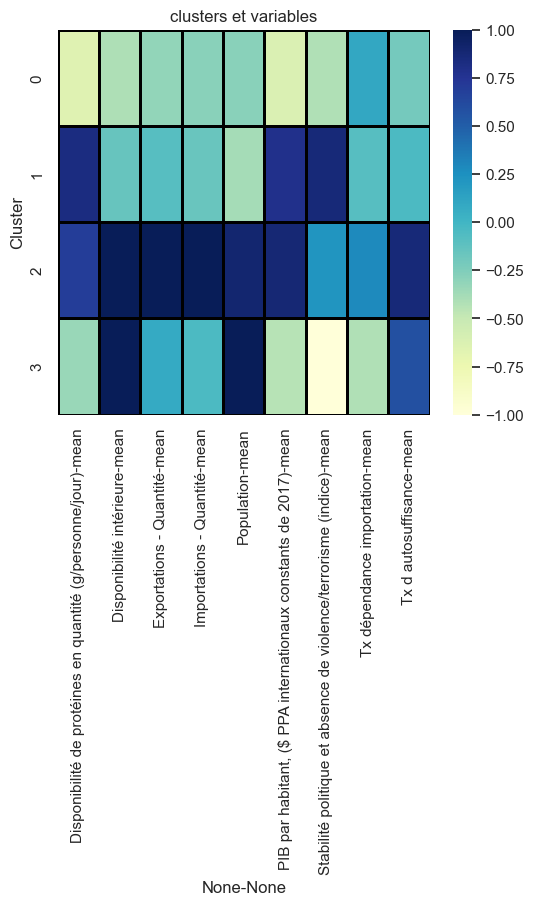

In [46]:
plt.figure()
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(data_mean,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1 )
plt.title('clusters et variables')
plt.show()

In [47]:
# le cluster 2 semble retenir les meilleures variables. 

In [48]:
cluster_2 = df_heatmap_kmeans.loc[df_heatmap_kmeans['Cluster']==2]

In [49]:
cluster_2

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Population,"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice),Tx dépendance importation,Tx d autosuffisance,Cluster
1,Afrique du Sud,1.263254,2.337561,0.087562,2.296931,0.782748,-0.311401,-0.264043,-0.228023,0.135774,2
4,Allemagne,0.155111,1.820245,3.935942,4.057965,1.409201,1.576283,0.714686,0.023904,0.353999,2
7,Arabie saoudite,1.526326,1.405300,-0.262291,3.413684,0.198795,1.298733,-0.669034,0.075635,-0.581621,2
16,Belgique,-0.455719,-0.345931,4.001952,1.351985,-0.330762,1.449709,0.534690,1.878818,5.476242,2
30,Chine - RAS de Hong-Kong,2.731770,-0.171218,4.048159,4.406950,-0.431230,1.902234,0.984680,2.941436,-1.412427,2
46,France,0.333495,1.593663,2.978798,2.253979,0.974058,1.167350,0.365944,-0.181982,0.602087,2
69,Japon,0.025377,2.742951,-0.262291,5.276730,2.504498,1.016528,1.299673,-0.143451,-0.109539,2
91,Mexique,0.389353,5.205322,-0.268892,4.755936,2.437932,-0.029244,-0.849030,-0.240041,0.100936,2
109,Pologne,0.908288,1.024479,6.437720,-0.167444,0.317302,0.468693,0.635938,-0.432674,2.167440,2
112,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1.201991,2.495895,2.041457,3.719717,1.020097,1.253778,0.489691,-0.121064,0.191116,2


<h4>Conclusion</h4>

Dans les deux méthodes, kmeans et dendrogramme, nous obtenons exactement la même liste de pays concernant le cluster 2. Voici donc ma conclusion globale de l'étude de marché pour l'export de poulet dans ces pays là:

Parmis le cluster 2, la Belgique, la Chine, le Japon, le Royaume-Uni de Grande-Bretagne et d'Irlande ont une disponibilité élevée de protéines par personne et par jour ainsi qu'un PIB par habitant élevé. Ils ont également une faible dépendance aux importations de poulet et un niveau élevé de stabilité politique. La forte disponibilité de protéines par personne et par jour suggère qu'il existe un marché potentiel pour les exportations de poulet, tandis que le PIB par habitant élevé indique que la population a le pouvoir d'achat nécessaire pour acheter du poulet importé. La faible dépendance aux importations de poulet et le niveau élevé de stabilité politique rendent également ces pays attractifs pour l'exportation de poulet.


L'Afrique du Sud, l'Allemagne, l'Arabie saoudite, le Mexique, la Pologne et la Thaïlande ont une disponibilité plus faible de protéines par personne et par jour ainsi qu'un PIB par habitant plus faible par rapport aux pays cités plus haut. Ils ont également une dépendance plus élevée aux importations de poulet et des niveaux de stabilité politique plus faibles. Les variables montrent néanmoins un marché potentiel pour les exportations de poulet dans ces pays, la disponibilité plus faible de protéines et le PIB par habitant plus faible peuvent signifier que la taille potentielle du marché est plus petite. De plus, la dépendance plus élevée aux importations de poulet et les niveaux de stabilité politique plus faibles peuvent rendre l'exportation vers ces pays un peu plus risquée.